<a href="https://colab.research.google.com/github/ektamistry/ekta/blob/main/Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import itertools
import seaborn as sns

In [ ]:
#importing stopwords removing package
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Preprocessing

In [ ]:
#Loading dataset to pandas dataframe
news_dataset = pd.read_csv('/content/file.csv',encoding='latin1')
#response = news_dataset.recv(1024).decode('utf-8', 'ignore')


<ipython-input-60-f2e9598c60ba>:2: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,153,154,155,156,157,158,159,160,161,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199) have mixed types. Specify dtype option on import or set low_memory=False.
  news_dataset = pd.read_csv('/content/file.csv',encoding='latin1')


In [ ]:
#Rows and Columns in dataset
news_dataset.shape

(10935, 200)

In [ ]:
#Printing the dataset 
news_dataset.head()


,Topic,Description,Title,vid_url,normalized_annotation,Num_of_Views,Likes,Dislikes,Number_of_Comments,Video_ID,...,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199
0,911,"22 years ago, federal agents raided the Branch...",The Shadow of Waco | Retro Report | The New Yo...,https://www.youtube.com/watch?v=hOW9AjskoOo,0,596113,5478,420,1688,hOW9AjskoOo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,911,:::VIEWER DISCRETION ADVISED::: Watch and list...,Former Abortionist Dr. Levatino Destroys Pro-C...,https://www.youtube.com/watch?v=dIRcw45n9RU,0,520316,15965,640,6828,dIRcw45n9RU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,federal law concerning abortion because if the...,000 oh yeah uh-huh are you still in your chair...,000 at 25 weeks it's a thousand for every week...,000 abortion and you can bet they don't take M...,000 cash is going to labor alone in a hotel ro...,000 they cannot afford to have a nurse or a do...,000 abortions per year last year alone they di...,000 abortions and then eventually became pro-l...,000 deaths a year before Roe was you know from...,000 charge it's a week long procedure okay thi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Plotting the dataset
labels=news_dataset.normalized_annotation
print(labels.head())

target =news_dataset.normalized_annotation.value_counts()
print(target)

sns.countplot(news_dataset.normalized_annotation)
plt.title("Distribution of Real and Fake News")
plt.show()

0                                                    0
1                                                    0
2                                                  NaN
3                                                  NaN
4    000 cash is going to labor alone in a hotel ro...
Name: normalized_annotation, dtype: object
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

ValueError: ignored

In [ ]:
#counting number of missing values
news_dataset.isnull().sum()

Topic                      154
Description               4772
Title                     7271
vid_url                   8223
normalized_annotation     8504
                         ...  
Unnamed: 195             10934
Unnamed: 196             10934
Unnamed: 197             10933
Unnamed: 198             10934
Unnamed: 199             10934
Length: 200, dtype: int64

In [ ]:
#relacing null values
news_dataset = news_dataset.fillna('')

In [ ]:
#merging author name and news title
#news_dataset['content'] = news_dataset['author']+news_dataset['title']

In [ ]:
#print(news_dataset['content'])

In [ ]:
# separating the data & label
#X = news_dataset.drop(columns='label',axis=1)
#X = news_dataset.drop(news_dataset.columns[[0,1,2,3,4,5,6,7,8,9]],axis=1)
X = news_dataset['Captions']
#Y = news_dataset['label']
Y = news_dataset['normalized_annotation']

In [ ]:
#separating the data and label
X = news_dataset['Captions'].values
Y = news_dataset['normalized_annotation'].values

In [ ]:
print(X)
print(Y)

["it happened outside Waco Texas a heavily armed compound a religious cult First Nations federal agents prepared for the worst in dealing with the Branch Davidians and cult leader David Koresh the huge numbers of Americans watch this play out on their television sets and the ending was incredibly horrifying the FBI standoff with the Branch Davidians ended over 20 years ago so why do these images continue to hold so much power today I'll be honest we saw what happened at Waco I think you have to worry about Waco when people start showing up with guns and saying they're willing to take on the federal government Waco can happen at any given time but the outcome will be different this time of that I can show you eleven months before the fire at Waco the Bureau of Alcohol Tobacco and Firearms began watching the Davidian complex Mount Carmel a UPS driver was delivering a package and out of the box felled some of these hollowed-out grenades the people at Mount Carmel were buying all sorts of 

Stemming


In [ ]:
port_stem = PorterStemmer()


In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
news_dataset['Captions'] = news_dataset['Captions'].apply(stemming)

In [ ]:
print(news_dataset['Captions'])

0        happen outsid waco texa heavili arm compound r...
1        thank come nice see good turnout appreci cup h...
2                                                         
3                                                         
4                                                         
                               ...                        
10930    hey welcom life noggin right e probabl watch v...
10931    ufo ghost psychic power histori riddl unexplai...
10932    kyri irv say flat earth conspiraci much like b...
10933    base show us seem fake present thing like moon...
10934    hey guy thank watch scientist mikey qin wonder...
Name: Captions, Length: 10935, dtype: object


In [ ]:
#separating the data and label
X = news_dataset['Captions'].values
Y = news_dataset['normalized_annotation'].values

In [ ]:
print(X)

['happen outsid waco texa heavili arm compound religi cult first nation feder agent prepar worst deal branch davidian cult leader david koresh huge number american watch play televis set end incred horrifi fbi standoff branch davidian end year ago imag continu hold much power today honest saw happen waco think worri waco peopl start show gun say will take feder govern waco happen given time outcom differ time show eleven month fire waco bureau alcohol tobacco firearm began watch davidian complex mount carmel up driver deliv packag box fell hollow grenad peopl mount carmel buy sort gun suppli includ kit convert ar automat fire feder law illeg convert gun fulli automat weapon davidian gun serv higher purpos life death koresh follow thought etern life assur die defend faith fearless respect bring forth judgement light everi morn unjust know davidian convinc end time immin foundat faith sinc koresh took follow believ chosen lead apocalypt battl heaven atf stockpil illeg weapon show davidia

In [ ]:
print(Y)

['0' '0' '' ... '-1' '1' '0']


In [ ]:
Y.shape

(10935,)

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7)
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 39318)	0.012132106851533247
  (0, 39201)	0.034814352162176425
  (0, 38997)	0.01094399620898155
  (0, 38946)	0.01708911279091074
  (0, 38931)	0.014106215269650772
  (0, 38920)	0.024693211975644707
  (0, 38823)	0.011627545849994864
  (0, 38820)	0.013699046062997274
  (0, 38759)	0.019893586313486117
  (0, 38738)	0.01973701751252641
  (0, 38660)	0.013906385773068486
  (0, 38644)	0.013780255760547
  (0, 38419)	0.022657395410991318
  (0, 38356)	0.03031888069252228
  (0, 38314)	0.013021403794249353
  (0, 38240)	0.05804626898040174
  (0, 38206)	0.017038006191359555
  (0, 38148)	0.01961527223870479
  (0, 38109)	0.021875774896452364
  (0, 38074)	0.024782853468516934
  (0, 38069)	0.017133519692200713
  (0, 38004)	0.014498436449439675
  (0, 37963)	0.5036878068202236
  (0, 37735)	0.017752768575902352
  (0, 37725)	0.01712058525799869
  :	:
  (10934, 3698)	0.023385607131147467
  (10934, 3474)	0.031404399687446245
  (10934, 3216)	0.16438684572756002
  (10934, 3215)	0.05463242550128815
  (10934, 

Spilting the dataset to training & test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=85)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

Training the model : Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

Evaluation

accuracy score

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9426611796982167


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9347050754458162


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(Y_train,X_train_prediction)
print(cf_matrix)

[[5638    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]


In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Metrics
from sklearn.metrics import accuracy_score

# model
def compute_metrics(data, y_true, model_obj, model):

  # Make predictions
  y_pred = model_obj.predict(data)

  # Compute accuracy
  acc = accuracy_score(y_true = y_true, y_pred = y_pred)

  # Make DataFrame
  metrics = pd.DataFrame(data = np.array([acc]), index=[model], columns=['Accuracy Score'])
  return metrics

Testing accuracy:   0.935
Confusion matrix, without normalization


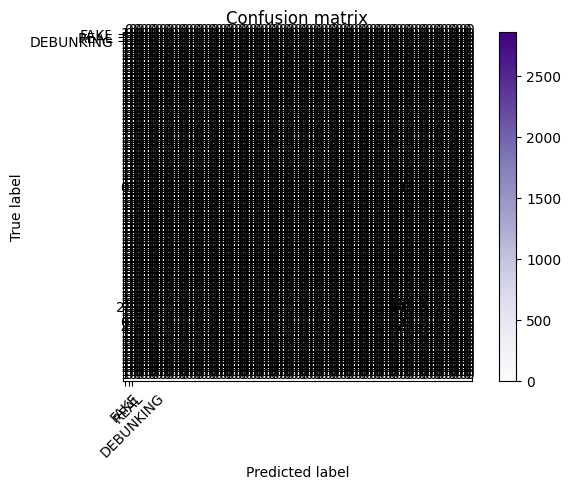

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

model.fit(X_train, Y_train)


prediction1 = model.predict(X_test)
score = metrics.accuracy_score(Y_test, prediction1)
print("Testing accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y_test,prediction1)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL','DEBUNKING'])

Logistic Regression

Naive Bayes

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
#let's implement the model : Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

Testing Accuracy:   0.916
Confusion matrix, without normalization


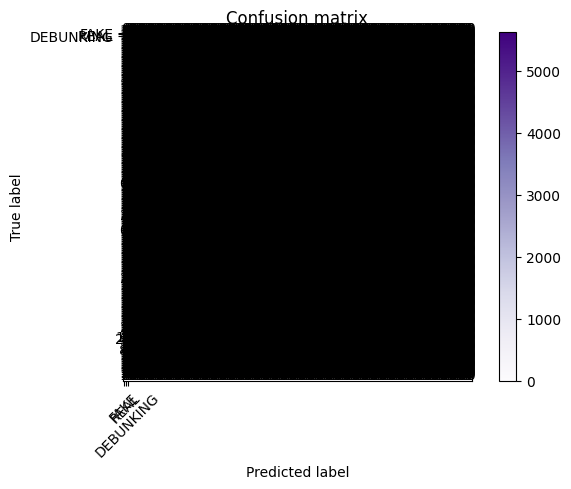

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X1_train, Y1_train)


prediction1 = classifier.predict(X1_test)
score = metrics.accuracy_score(Y1_test, prediction1)
print("Testing Accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y_train,X_train_prediction)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL','DEBUNKING'])

Passive Aggressive

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
classifier = PassiveAggressiveClassifier()
classifier.fit(X_train,Y_train)

PassiveAggressiveClassifier()

Training Accuracy:   0.199
Testing Accuracy:   0.165
Confusion matrix, without normalization


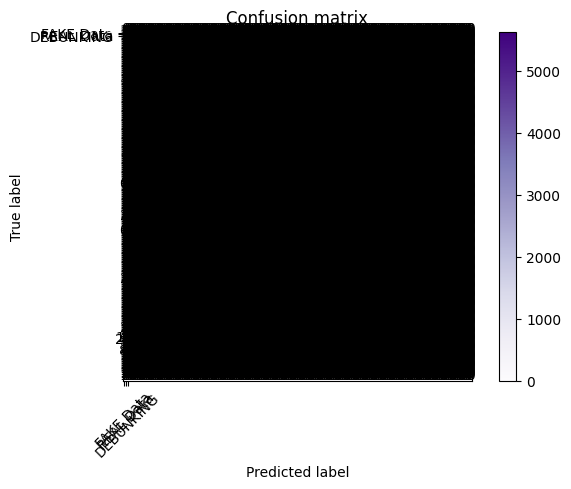

In [ ]:
#lets implemet the algorithm : Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(X2_train, Y2_train)

prediction1 = linear_clf.predict(X2_train)
train_score = metrics.accuracy_score(Y2_train, prediction1)
print("Training Accuracy:   %0.3f" % train_score)

prediction2 = linear_clf.predict(X2_test)
score = metrics.accuracy_score(Y2_test, prediction2)
print("Testing Accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y_train,X_train_prediction)
plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data','DEBUNKING'])

In [ ]:
Y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
#plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Accuracy: 15.97%


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC= RandomForestClassifier(random_state=0)
RFC.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [ ]:
RFC.score(X_test,Y_test)

0.9286694101508917

Testing Accuracy:   0.929
Confusion matrix, without normalization


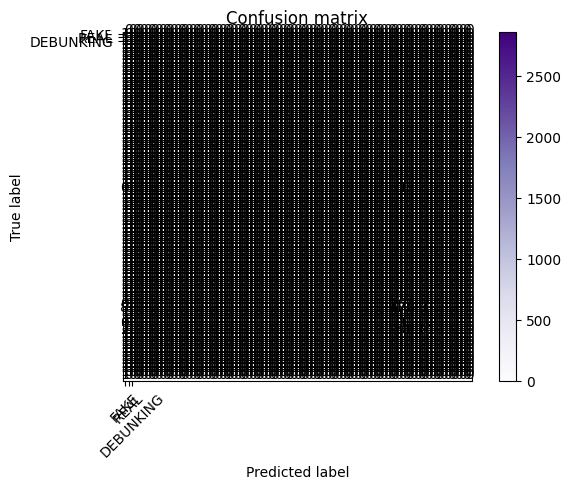

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

RFC.fit(X_train, Y_train)

prediction1 = RFC.predict(X_test)
score = metrics.accuracy_score(Y_test, prediction1)
print("Testing Accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y_test,prediction1)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL','DEBUNKING'])

Decision tree

In [ ]:
#from sklearn.tree import DecisionTreeClassifier

In [ ]:
#DT=DecisionTreeClassifier()
#DT.fit(X_train,Y_train)

In [ ]:
# accuracy score on the training data
#X_train_prediction = DT.predict(X_train)
#training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
#print('Accuracy score of the training data : ', training_data_accuracy)

In [ ]:
# accuracy score on the test data
#X_test_prediction = DT.predict(X_test)
#test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
#print('Accuracy score of the test data : ', test_data_accuracy)

In [ ]:
#save model
import pickle
filename="finalized_model.pkl"
pickle.dump(linear_clf,open(filename,'wb'))

NameError: ignored

In [ ]:
#save vectorizer
filename="vectorizer.pkl"
pickle.dump(vectorizer,open(filename,'wb'))

Making predictive system

In [ ]:
X_new = X_test[5]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
elif(prediction[0]==-1):
  print('It is a debunking news')
else:
  print('The news is fake')

['']
The news is fake


In [ ]:
print(Y_test[28])